NAME : PAREENITA SHIRSATH   PRN : 221101062
B.E.A.I.&.D.S.    
DLL EXPERIMENT NO : 04

AIM : Apply any of the following learning algorithms to learn the parameters of the supervised single layer feedforward neural network:
a. Stochastic Gradient Descent, b. Mini Batch Gradient Descent, c. Momentum GD, d. Nesterov GD, e. Adagrad GD, f. Adam Learning GD

a. Stochastic Gradient Descent (SGD)

Explanation: Updates are made after each training example, giving very frequent updates. May be noisy but fast to converge in some cases.



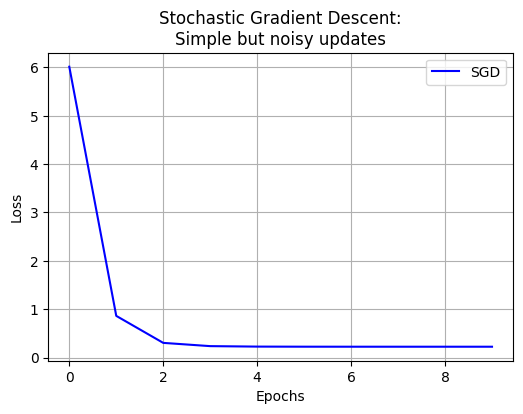

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
#np.random.seed(0) sets the random seed for reproducibility.
#X is a matrix of shape (100 samples, 3 features), generated from a normal distribution.
#true_W is the actual weights we use to generate targets.
#y is the target values generated by multiplying X with true_W plus some noise (0.5 * np.random.randn(...)) to simulate realistic imperfect data.

np.random.seed(0)                 #When you set a seed, you're telling the random number generator where to start. This means every time you run your code with the same seed, it will produce the exact same sequence of random numbers.


true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.01

loss_sgd = [] #Loss Tracking Initialization

# Loop over each data point for 10 epochs
#Outer loop runs 10 epochs (passes over the entire dataset).
#Inner loop iterates over each individual training example (X.shape[0] == 100).
#xi and yi extract a single data point (row) and its corresponding label.
#This per-sample update is what defines stochastic gradient descent (SGD).

for epoch in range(10):
    epoch_loss = 0
    for i in range(X.shape[0]):
        xi = X[i:i+1]
        yi = y[i:i+1]

        # Forward pass
        y_pred = xi @ W + b

        # Compute loss for monitoring #Calculate mean squared error (MSE) for the single sample prediction.
        loss = np.mean((y_pred - yi) ** 2)
        epoch_loss += loss

        #Backward Pass (Gradient Calculation)
        # Compute gradients
        #Calculate the error term: predicted minus true.
#Compute gradient of weights dW using the chain rule.
#xi.T is transpose of input (3x1).
#error is scalar (1x1).
#So dW is (3x1) vector — gradient for each weight.
#Compute gradient for bias db (scalar).

        error = y_pred - yi
        dW = xi.T @ error
        db = np.sum(error)

        # Parameter update
        W -= lr * dW
        b -= lr * db

    # Average loss per epoch
    loss_sgd.append(epoch_loss / X.shape[0])

# Plot loss after training
plt.figure(figsize=(6,4))
plt.plot(loss_sgd, label='SGD', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent:\nSimple but noisy updates')
plt.legend()
plt.grid(True)
plt.show()



b. Mini-Batch Gradient Descent

Explanation: Uses small batches for updates, reducing noise while being more efficient than full-batch gradient descent.



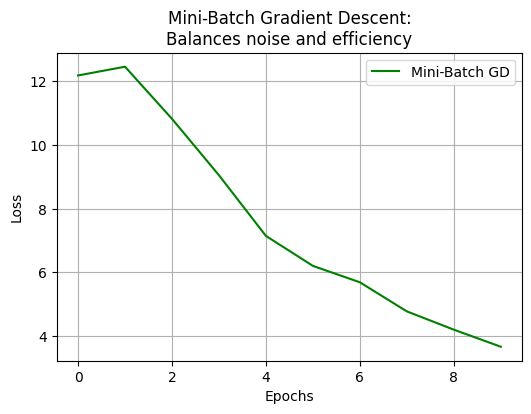

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.01
batch_size = 16

loss_mbgd = []

for epoch in range(10):
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    epoch_loss = 0
    num_batches = 0

    for i in range(0, X.shape[0], batch_size):
        xb = X_shuffled[i:i+batch_size]
        yb = y_shuffled[i:i+batch_size]

        y_pred = xb @ W + b
        error = y_pred - yb
        dW = xb.T @ error / batch_size
        db = np.sum(error) / batch_size

        # Parameter update
        W -= lr * dW
        b -= lr * db

        # Calculate loss for this batch
        batch_loss = np.mean(error ** 2)
        epoch_loss += batch_loss
        num_batches += 1

    # Average loss for epoch
    loss_mbgd.append(epoch_loss / num_batches)

# Plotting loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_mbgd, label='Mini-Batch GD', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mini-Batch Gradient Descent:\nBalances noise and efficiency')
plt.legend()
plt.grid(True)
plt.show()


c. Momentum Gradient Descent

Explanation: Adds a velocity term that helps continue in the same direction, accelerating in valleys and dampening oscillations.



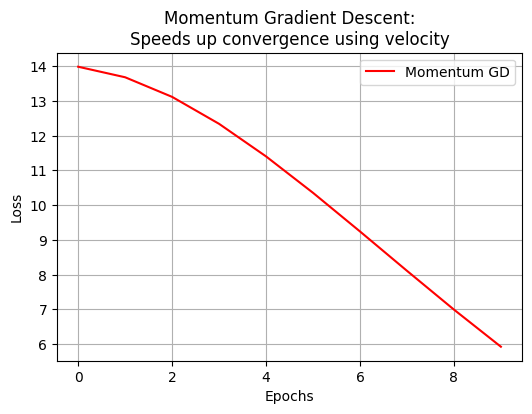

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.01
momentum = 0.9

# Initialize velocity terms
v_W = np.zeros_like(W)
v_b = np.zeros_like(b)

loss_momentum = []

for epoch in range(10):
    # Forward pass
    y_pred = X @ W + b

    # Compute error and loss
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_momentum.append(loss)

    # Compute gradients (batch)
    dW = X.T @ error / X.shape[0]
    db = np.sum(error) / X.shape[0]

    # Momentum update
    v_W = momentum * v_W - lr * dW
    v_b = momentum * v_b - lr * db

    # Update parameters
    W += v_W
    b += v_b

# Plotting loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_momentum, label='Momentum GD', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Momentum Gradient Descent:\nSpeeds up convergence using velocity')
plt.legend()
plt.grid(True)
plt.show()


d. Nesterov Accelerated Gradient

Explanation: Improves on momentum by computing gradient at the future position (lookahead), leading to faster convergence in practice.

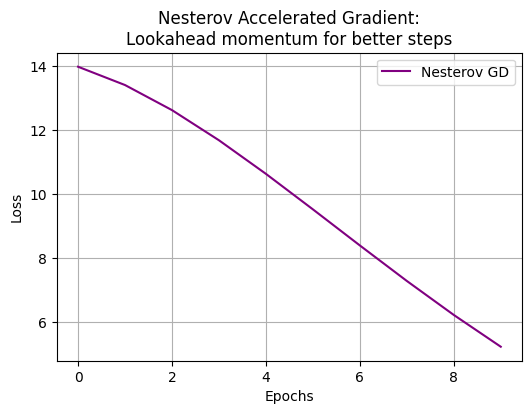

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.01
momentum = 0.9

v_W = np.zeros_like(W)
v_b = np.zeros_like(b)

loss_nesterov = []

for epoch in range(10):
    # Lookahead step: calculate parameters with momentum before gradient
    W_lookahead = W + momentum * v_W
    b_lookahead = b + momentum * v_b

    # Forward pass with lookahead parameters
    y_pred = X @ W_lookahead + b_lookahead
    error = y_pred - y

    # Compute loss and store
    loss = np.mean(error ** 2)
    loss_nesterov.append(loss)

    # Compute gradients at lookahead parameters
    dW = X.T @ error / X.shape[0]
    db = np.sum(error) / X.shape[0]

    # Update velocity
    v_W = momentum * v_W - lr * dW
    v_b = momentum * v_b - lr * db

    # Update parameters
    W += v_W
    b += v_b

# Plot loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_nesterov, label='Nesterov GD', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Nesterov Accelerated Gradient:\nLookahead momentum for better steps')
plt.legend()
plt.grid(True)
plt.show()


e. Adagrad

Explanation: Accumulates squared gradients to adaptively shrink the learning rate. Good for sparse data.



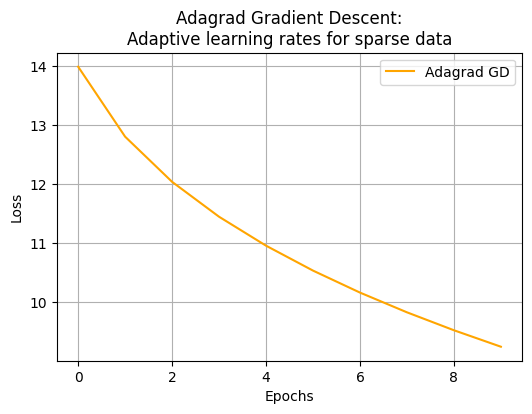

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.1  # Usually higher for Adagrad
eps = 1e-8

G_W = np.zeros_like(W)
G_b = np.zeros_like(b)

loss_adagrad = []

for epoch in range(10):
    # Forward pass
    y_pred = X @ W + b
    error = y_pred - y

    # Compute loss and store
    loss = np.mean(error ** 2)
    loss_adagrad.append(loss)

    # Compute gradients
    dW = X.T @ error / X.shape[0]
    db = np.sum(error) / X.shape[0]

    # Accumulate squared gradients
    G_W += dW ** 2
    G_b += db ** 2

    # Update parameters with adaptive learning rate
    W -= (lr / (np.sqrt(G_W) + eps)) * dW
    b -= (lr / (np.sqrt(G_b) + eps)) * db

# Plotting loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_adagrad, label='Adagrad GD', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Adagrad Gradient Descent:\nAdaptive learning rates for sparse data')
plt.legend()
plt.grid(True)
plt.show()


f. Adam Optimizer

Explanation: Combines momentum and adaptive learning rate. One of the most popular optimizers in deep learning.



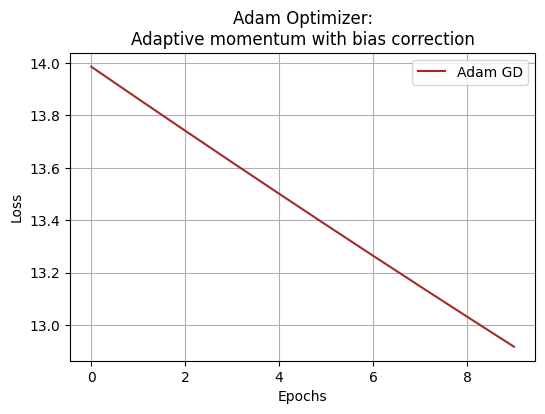

In [16]:

import numpy as np
import matplotlib.pyplot as plt

# Sample synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Initialize parameters
W = np.random.randn(3, 1)
b = 0.0
lr = 0.01

#beta1 controls the decay rate for the first moment estimate (momentum-like term).
#beta2 controls the decay rate for the second moment estimate (variance or RMSProp-like term).
#eps is a small number added to denominators to avoid division by zero.
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

#m_W and m_b store the first moments (exponentially weighted averages of gradients).
#v_W and v_b store the second moments (exponentially weighted averages of squared gradients).
#Initialized to zero arrays with the same shapes as parameters.

m_W = np.zeros_like(W)
v_W = np.zeros_like(W)
m_b = np.zeros_like(b)
v_b = np.zeros_like(b)

loss_adam = []

for epoch in range(1, 11):  # Epoch 1 to 10
    y_pred = X @ W + b
    error = y_pred - y

    # Compute loss and store
    loss = np.mean(error ** 2)
    loss_adam.append(loss)

    # Compute gradients
    dW = X.T @ error / X.shape[0]
    db = np.sum(error) / X.shape[0]

    # Update biased first moment estimate
    m_W = beta1 * m_W + (1 - beta1) * dW
    m_b = beta1 * m_b + (1 - beta1) * db

    # Update biased second moment estimate
    v_W = beta2 * v_W + (1 - beta2) * (dW ** 2)
    v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

    # Compute bias-corrected first moment estimate
    m_W_hat = m_W / (1 - beta1 ** epoch)
    m_b_hat = m_b / (1 - beta1 ** epoch)

    # Compute bias-corrected second moment estimate
    v_W_hat = v_W / (1 - beta2 ** epoch)
    v_b_hat = v_b / (1 - beta2 ** epoch)

    # Update parameters
    W -= lr * m_W_hat / (np.sqrt(v_W_hat) + eps)
    b -= lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

# Plot loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_adam, label='Adam GD', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Adam Optimizer:\nAdaptive momentum with bias correction')
plt.legend()
plt.grid(True)
plt.show()

#This code implements the Adam optimizer for linear regression.
#Adam combines the benefits of momentum and adaptive learning rates.
#The random seed guarantees the synthetic data and initialization remain the same on every run.
#The loss plot helps verify that the optimizer is effectively minimizing the error.
